# Classification Algorithms On Iris Dataset

# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target[0]

0

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
model = LogisticRegression()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.2)
model.fit(X_train,y_train)


LogisticRegression()

In [9]:
model.score(X_test,y_test)

0.9666666666666667

In [10]:
target_index = 98
target_index_predicted = model.predict([iris.data[target_index]])
iris.target_names[target_index_predicted]

array(['versicolor'], dtype='<U10')

In [11]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)
cm

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

Text(33.22222222222222, 0.5, 'Truth')

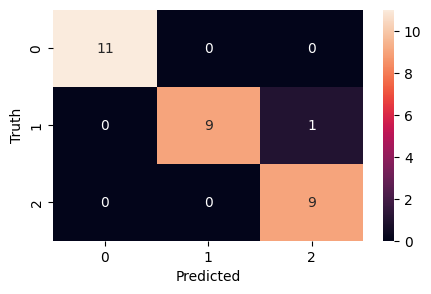

In [12]:
plt.figure(figsize=(5,3))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Decision Tree Algrithm

In [13]:
# Load the data into 2 different pandas dataframes. 
# X for the features
X = pd.DataFrame(iris.data, columns=iris.feature_names)
# y for the targets
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [14]:
# Let's explore our features.
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
print(y)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [16]:
# Convert categorical data into dummy/indicator variables.
y = pd.get_dummies(y)
y

,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [17]:
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.25)

## Import and create the model
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn import tree
dt = DecisionTreeClassifier()

# Train our model with our training data.
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
#pre-pruning
parameter={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()  #model obj creation
#model.fit(x_train,y_train)
cv=GridSearchCV(model,parameter,scoring='accuracy')
cv.fit(x_train,y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [19]:
best_model=cv.best_estimator_
best_model

DecisionTreeClassifier(max_depth=4, max_features='log2')

In [20]:
# Call the .predict() function of the model and feed in the testing data
y_pred = dt.predict(X_test)

[Text(0.40789473684210525, 0.9, 'x[0] <= 5.55\ngini = 0.667\nsamples = 112\nvalue = [37, 37, 38]'),
 Text(0.10526315789473684, 0.7, 'x[2] <= 2.45\ngini = 0.305\nsamples = 44\nvalue = [36, 7, 1]'),
 Text(0.05263157894736842, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.15789473684210525, 0.5, 'x[2] <= 4.45\ngini = 0.219\nsamples = 8\nvalue = [0, 7, 1]'),
 Text(0.10526315789473684, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.21052631578947367, 0.3, 'x[3] <= 1.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.15789473684210525, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2631578947368421, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.7105263157894737, 0.7, 'x[3] <= 1.75\ngini = 0.509\nsamples = 68\nvalue = [1, 30, 37]'),
 Text(0.5263157894736842, 0.5, 'x[2] <= 4.95\ngini = 0.258\nsamples = 34\nvalue = [1, 29, 4]'),
 Text(0.42105263157894735, 0.3, 'x[3] <= 0.6\ngini = 0.069\nsamples = 28\nvalue = [1, 27, 0]'),
 Text(0.36

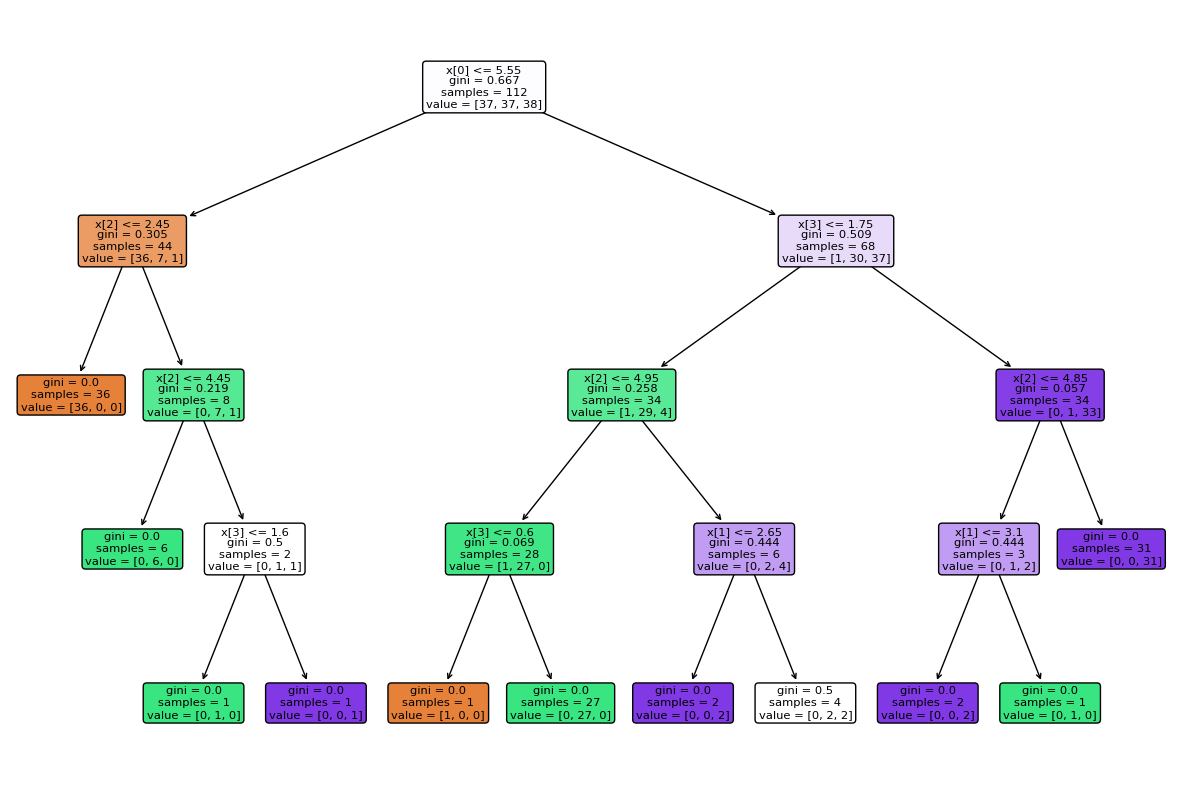

In [21]:
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=None, class_names=None, filled=True, rounded=True)

In [22]:
#Post Pruning
#model=DecisionTreeClassifier()
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

[0.         0.00866597 0.01190476 0.01734694 0.03724075 0.23903276
 0.33185162]


In [23]:
y_pred=cv.predict(iris.data)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,iris.target)
score

0.9866666666666667

In [25]:
y_pred=clf.predict(iris.data)
score1=accuracy_score(y_pred,iris.target)
score1

0.3333333333333333

In [26]:
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred1=model1.predict(iris.data)
score2=accuracy_score(y_pred1,iris.target)
score2

1.0

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [29]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [30]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [31]:
#input variable
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
#Output variable
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
#Assigning input and output variables
X = iris.data
Y = iris.target

In [34]:
#data dimension
X.shape

(150, 4)

In [35]:
Y.shape

(150,)

In [36]:
# Classification Model using Random Forest
clf = RandomForestClassifier()
clf.fit(X, Y)

RandomForestClassifier()

In [37]:
print(clf.feature_importances_)

[0.09438934 0.02178877 0.38864246 0.49517942]


In [38]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [39]:
print(clf.predict([[5.1, 3.5, 1.4, 0.2]]))

[0]


In [40]:
print(clf.predict(X[[0]]))

[0]


In [41]:
print(clf.predict_proba(X[[0]]))

[[1. 0. 0.]]


In [42]:
clf.fit(iris.data, iris.target_names[iris.target])

RandomForestClassifier()

In [43]:
#Data split (80/20 ratio)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape

((120, 4), (120,))

In [44]:
X_test.shape, Y_test.shape

((30, 4), (30,))

In [45]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [46]:
#Performs prediction on single sample from the data set
print(clf.predict([[5.1, 3.5, 1.4, 0.2]]))

[0]


In [47]:
print(clf.predict_proba([[5.1, 3.5, 1.4, 0.2]]))

[[1. 0. 0.]]


In [48]:
#Performs prediction on the test set
#Predicted class labels
print(clf.predict(X_test))

[2 1 0 0 0 2 2 2 1 1 0 0 1 0 0 0 1 2 2 2 2 0 1 2 0 1 0 0 0 0]


In [49]:
#Actual class labels
print(Y_test)

[2 1 0 0 0 2 2 2 1 1 0 0 1 0 0 0 2 2 1 2 2 0 1 2 0 1 0 0 0 0]


In [50]:
#Model Performance
print(clf.score(X_test, Y_test))


0.9333333333333333


# Ensemble Techniques

## Support Vector Machine

In [51]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel = 'rbf', C = 3)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

1.0

In [52]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[14  0  0]
 [ 0  7  0]
 [ 0  0  9]]


## KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  classification_report

# Create a KNN classifier with a specified number of neighbors (k)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Fit the KNN classifier to the training data
knn.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = knn.predict(X_test)


In [54]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [55]:
# Generate a classification report
class_report = classification_report(Y_test, Y_pred)
print('Classification Report:\n', class_report)



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      1.00      0.93         7
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [56]:
# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[14  0  0]
 [ 0  7  0]
 [ 0  1  8]]


## KNN with Parameter Tuning

In [57]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Test different values of n_neighbors
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Number of Neighbors:", best_params['n_neighbors'])

# Get the best trained model
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy with Best Model: {accuracy:.2f}')

Best Number of Neighbors: 3
Accuracy with Best Model: 0.97
